<a href="https://colab.research.google.com/github/wguesdon/BrainPost_google_analytics/blob/master/EDA_v01_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About BrainPost

Kasey runs BrainPost with a fellow PhD friend as a way to keep in touch with her scientific roots while working as a data scientist! Every Tuesday since we started in early 2018, we publish our e-newsletter which is three short summaries of new neuroscience studies that have just come out. After publishing on our website each Tuesday, we typically post on Twitter (@brainpostco) and Facebook (@brainpostco) once to announce the release of the e-newsletter and three times (once for each of the three summaries) to highlight each summary. There are a few exceptions to our publishing schedule. Sometimes we post extra articles here: https://www.brainpost.co/brainpost-life-hacks, and also a few weeks we've only been able to publish two summaries instead of three.  At around the same time as we publish the e-newsletter on the website each Tuesday, we also send it to our ~1700 email subscribers directly (via mailchimp).

# About the Challenge

We're always wondering if we should change what type of content we're publishing, and how people are finding us. From some small surveys we've done for example, we find people would be interested in more casual/applicable to daily life content (like we publish on this tab https://www.brainpost.co/brainpost-life-hacks) than more technical summaries of complex articles, but we also aren't really sure if that's just a subgroup of people who get the e-newsletter to their email inbox filling out the survey. We also might have two audiences - academics and non-academics (?) who like different things.

# About the data

In the remaining tabs of this workbook there is weekly pageview data for each page on the website (I think..according to our google analytics). Each tab represents pageview data for two one week periods, split up by the page name/URL and the source/medium (first two columns). My general idea was people can look at the data at a weekly cadence and figure out stats about different pages/content, BUT with google analytics a huge problem is that it doesn't really take into account that different content is published on different days (for example, a stat about 'only 2 pageviews' to a page is meaningless to me if it is because the page was only published an hour ago). Our content is published weekly so it should approximately match that I extracted the data weekly. My apologies for the formatting... Google analytics was a nightmare to extract from - a very manual process. But, I guess data cleaning is a part of the process! So, we've been publishing ~3 new pages a week since 2018, but I've only included data starting in July 2020 because the data extraction process is so manual. The date of publication can be extracted from the URL.

We've noticed some pages seem really popular possibly for strange reasons (maybe they come up on the first page of google because people are searching for something really similar?) and those anomalies might not reflect what people like overall about the site.

There is also a tab with a page (URL) to page title lookup

# The questions we'd like to ask

What content (or types of content) is most popular (what are patterns we see in popular content) and is different content popular amongst different subgroups (e.g. by source/medium)?

Any question that will help us to take action to better tailor our content to our audience(s) or understand how traffic comes to the site.

Where are people visiting from (source-wise)?

# How this challenge works:

Just like the last challenge, you can submit an entry by posting a github link to your analysis on the signup page (second tab). Use any combination of reports/visuals/code/presentation you think is best - just make sure your code is accessible!

Let's have a few days for people to review the data and ask any questions and then we can discuss what everyone thinks is a reasonable deadline/timeline and set the timeline from there. If you have any further data requests you think would help answer the questions I might be able to get it (google analytics or mailchimp).

After the deadline I'll choose the first and second place submission. The criteria will be whatever submission provides the most compelling evidence that gives me a clear idea of what actions we could take next to improve the site.

# Initialize

In [ ]:
# to use Panda profilling
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Created wheel for pandas-profiling: filename=pandas_profiling-2.9.0-py2.py3-none-any.whl size=258952 sha256=db6de102cfabff0c570bb4e18eb2e911b25dfdd2d239f8514b00b776c0bb6ff6
  Stored in directory: /tmp/pip-ephem-wheel-cache-4ew95pq9/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
Successfully built pandas-profiling


In [ ]:
# Load libraries
# https://stackoverflow.com/questions/58667299/google-colab-why-matplotlib-has-a-behaviour-different-then-default-after-import
# Panda profilling alter seaborn plotting style

from google.colab import drive # to load data from google drive
from pandas_profiling import ProfileReport
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # ploting the data
import seaborn as sns # ploting the data
%matplotlib inline
import math # calculation

In [ ]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# List files
# see https://careerkarma.com/blog/python-list-files-in-directory/
import os
os.listdir('/content/drive/MyDrive/DSS/BrainPost_blog/Data')

['DSS BrainPost Web Analytics Challenge!.xlsx']

# Data Cleaning and Wrangling

In [ ]:
# Load the data
# See https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html
# See https://datatofish.com/read_excel/

# Load the Pages Titles
pages_tiltes = pd.read_excel(r'/content/drive/MyDrive/DSS/BrainPost_blog/Data/DSS BrainPost Web Analytics Challenge!.xlsx', sheet_name='Page to Page Title lookup')

# Remove headers
pages_tiltes = pages_tiltes.iloc[6:258,]
# Fix columns names
# See https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html
pages_tiltes = pages_tiltes.rename(columns={"# ----------------------------------------": "Page", "Unnamed: 1": "Page_title"})

pages_tiltes

,Page,Page_title
6,/,BrainPost | Making it Easy to Keep Up With the...
7,/weekly-brainpost,Weekly BrainPost — BrainPost | Easy-to-read su...
8,/weekly-brainpost/2018/9/4/mapping-subjective-...,Mapping Subjective Feelings — BrainPost | Easy...
9,/weekly-brainpost/2018/10/2/effects-of-the-cli...,Effects of the Clinical SSRI Escitalopram on C...
10,/brainpost-life-hacks/2019/1/2/new-year-new-me...,"New Year, New Me: The Neuroscience of Habit Fo..."
...,...,...
253,/weekly-brainpost/2020/9/29/prediction-of-the-...,Prediction of the Future Can Block Memory Form...
254,/weekly-brainpost/2020/9/29/rem-sleep-is-neces...,REM Sleep is Necessary for Experience-Dependen...
255,/weekly-brainpost/2020/9/8/neuropeptides-and-a...,Neuropeptides and Astrocytes Regulate Adult Ne...
256,/weekly-brainpost/2020/9/8/the-role-of-the-med...,The Role of The Medial Prefrontal Cortex In Ex...


In [ ]:

# Load the Pages Titles
pages_tiltes = pd.read_excel(r'/content/drive/MyDrive/DSS/BrainPost_blog/Data/DSS BrainPost Web Analytics Challenge!.xlsx', sheet_name='Page to Page Title lookup', skiprows=6)

pages_tiltes

,Page,Page Title
0,/,BrainPost | Making it Easy to Keep Up With the...
1,/weekly-brainpost,Weekly BrainPost — BrainPost | Easy-to-read su...
2,/weekly-brainpost/2018/9/4/mapping-subjective-...,Mapping Subjective Feelings — BrainPost | Easy...
3,/weekly-brainpost/2018/10/2/effects-of-the-cli...,Effects of the Clinical SSRI Escitalopram on C...
4,/brainpost-life-hacks/2019/1/2/new-year-new-me...,"New Year, New Me: The Neuroscience of Habit Fo..."
...,...,...
247,/weekly-brainpost/2020/9/29/prediction-of-the-...,Prediction of the Future Can Block Memory Form...
248,/weekly-brainpost/2020/9/29/rem-sleep-is-neces...,REM Sleep is Necessary for Experience-Dependen...
249,/weekly-brainpost/2020/9/8/neuropeptides-and-a...,Neuropeptides and Astrocytes Regulate Adult Ne...
250,/weekly-brainpost/2020/9/8/the-role-of-the-med...,The Role of The Medial Prefrontal Cortex In Ex...


In [ ]:
# Load the content-pages oct 4-17
# Skip the first 6 rows with headers
# Skip the last 18 rows with total view
# See https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html
# See https://stackoverflow.com/questions/49876077/pandas-reading-excel-file-starting-from-the-row-below-that-with-a-specific-valu

In [ ]:
#content-pages july 12-25
july12_25 = pd.read_excel(r'/content/drive/MyDrive/DSS/BrainPost_blog/Data/DSS BrainPost Web Analytics Challenge!.xlsx', 
                         sheet_name='content-pages july 12-25', 
                        skiprows=6, skipfooter=20)
#july12_25

In [ ]:
#content-pages jul 26 - aug 8
jul26_aug8 = pd.read_excel(r'/content/drive/MyDrive/DSS/BrainPost_blog/Data/DSS BrainPost Web Analytics Challenge!.xlsx', 
                         sheet_name='content-pages jul 26 - aug 8', 
                        skiprows=6, skipfooter=20)
#jul26_aug8

In [ ]:
#content-pages aug 9-22
aug9_22 = pd.read_excel(r'/content/drive/MyDrive/DSS/BrainPost_blog/Data/DSS BrainPost Web Analytics Challenge!.xlsx', 
                         sheet_name='content-pages aug 9-22', 
                        skiprows=6, skipfooter=20)
#aug9_22

In [ ]:
#content-pages aug23-sept5
aug23_sept5 = pd.read_excel(r'/content/drive/MyDrive/DSS/BrainPost_blog/Data/DSS BrainPost Web Analytics Challenge!.xlsx', 
                         sheet_name='content-pages aug23-sept5', 
                        skiprows=6, skipfooter=20)
#aug23_sept5

In [ ]:
#content-pages sept 6-19
sept6_19 = pd.read_excel(r'/content/drive/MyDrive/DSS/BrainPost_blog/Data/DSS BrainPost Web Analytics Challenge!.xlsx', 
                         sheet_name='content-pages sept 6-19', 
                        skiprows=6, skipfooter=20)
#sept6_19

In [ ]:
#content-pages sept 20-oct3
sept20_oct3 = pd.read_excel(r'/content/drive/MyDrive/DSS/BrainPost_blog/Data/DSS BrainPost Web Analytics Challenge!.xlsx', 
                         sheet_name='content-pages sept 20-oct3', 
                        skiprows=6, skipfooter=20)
#sept20_oct3

In [ ]:
#content-pages oct 4-17
Oct4_17 = pd.read_excel(r'/content/drive/MyDrive/DSS/BrainPost_blog/Data/DSS BrainPost Web Analytics Challenge!.xlsx', 
                        sheet_name='content-pages oct 4-17', 
                        skiprows=6, skipfooter=20)
#Oct4_17

In [ ]:
#content-pages oct 18-31
Oct18_31 = pd.read_excel(r'/content/drive/MyDrive/DSS/BrainPost_blog/Data/DSS BrainPost Web Analytics Challenge!.xlsx', 
                         sheet_name='content-pages oct 18-31', 
                        skiprows=6, skipfooter=20)
#Oct18_31

In [ ]:
# Combine data frame
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.combine.html
# https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

frames = [july12_25,
          jul26_aug8,
          aug9_22,
          aug23_sept5,
          sept6_19,
          sept20_oct3,
          Oct4_17,
          Oct18_31]
df = pd.concat(frames)
df

,Page,Source / Medium,Date Range,Pageviews,Unique Pageviews,Avg. Time on Page,Entrances,Bounce Rate,% Exit,Page Value
0,/weekly-brainpost/tag/precentral+gyrus,google / organic,"Jul 19, 2020 - Jul 25, 2020",0,0,00:00:00,0,0.0000,0.0000,0
1,/weekly-brainpost/tag/precentral+gyrus,google / organic,"Jul 12, 2020 - Jul 18, 2020",1,1,00:00:00,1,1.0000,1.0000,0
2,/weekly-brainpost/tag/neuroinflammation,google / organic,"Jul 19, 2020 - Jul 25, 2020",2,2,00:00:00,2,1.0000,1.0000,0
3,/weekly-brainpost/tag/neuroinflammation,google / organic,"Jul 12, 2020 - Jul 18, 2020",0,0,00:00:00,0,0.0000,0.0000,0
4,/weekly-brainpost/2020/7/7/two-basal-forebrain...,google / organic,"Jul 19, 2020 - Jul 25, 2020",1,1,00:00:00,1,1.0000,1.0000,0
...,...,...,...,...,...,...,...,...,...,...
1537,/,skypeascientist.com / referral,"Oct 18, 2020 - Oct 24, 2020",0,0,00:00:00,0,0.0000,0.0000,0
1538,/,t.co / referral,"Oct 25, 2020 - Oct 31, 2020",3,3,00:00:32,2,0.5000,0.3333,0
1539,/,t.co / referral,"Oct 18, 2020 - Oct 24, 2020",10,6,00:00:10,3,0.3333,0.3000,0
1540,/,yahoo / organic,"Oct 25, 2020 - Oct 31, 2020",0,0,00:00:00,0,0.0000,0.0000,0


In [ ]:
# Merge with the page title data frame
# https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

In [ ]:
df_inner = pd.merge(df, pages_tiltes, how='inner', on='Page')
df_inner

,Page,Source / Medium,Date Range,Pageviews,Unique Pageviews,Avg. Time on Page,Entrances,Bounce Rate,% Exit,Page Value,Page Title
0,/weekly-brainpost/2020/7/7/two-basal-forebrain...,google / organic,"Jul 19, 2020 - Jul 25, 2020",1,1,00:00:00,1,1.0,1.0,0,Two Basal Forebrain Cholinergic Neuron Types S...
1,/weekly-brainpost/2020/7/7/two-basal-forebrain...,google / organic,"Jul 12, 2020 - Jul 18, 2020",0,0,00:00:00,0,0.0,0.0,0,Two Basal Forebrain Cholinergic Neuron Types S...
2,/weekly-brainpost/2020/7/7/two-basal-forebrain...,t.co / referral,"Jul 19, 2020 - Jul 25, 2020",1,1,00:00:00,1,1.0,1.0,0,Two Basal Forebrain Cholinergic Neuron Types S...
3,/weekly-brainpost/2020/7/7/two-basal-forebrain...,t.co / referral,"Jul 12, 2020 - Jul 18, 2020",0,0,00:00:00,0,0.0,0.0,0,Two Basal Forebrain Cholinergic Neuron Types S...
4,/weekly-brainpost/2020/7/7/two-basal-forebrain...,google / organic,"Aug 2, 2020 - Aug 8, 2020",0,0,00:00:00,0,0.0,0.0,0,Two Basal Forebrain Cholinergic Neuron Types S...
...,...,...,...,...,...,...,...,...,...,...,...
4089,/weekly-brainpost?offset=1603208522960,(direct) / (none),"Oct 18, 2020 - Oct 24, 2020",2,2,00:00:00,0,0.0,1.0,0,Weekly BrainPost — BrainPost | Easy-to-read su...
4090,/weekly-brainpost?offset=1603208522960,google / organic,"Oct 25, 2020 - Oct 31, 2020",2,2,00:02:34,0,0.0,0.5,0,Weekly BrainPost — BrainPost | Easy-to-read su...
4091,/weekly-brainpost?offset=1603208522960,google / organic,"Oct 18, 2020 - Oct 24, 2020",1,1,00:00:00,0,0.0,1.0,0,Weekly BrainPost — BrainPost | Easy-to-read su...
4092,/search?q=Flora Moujaes,(direct) / (none),"Oct 25, 2020 - Oct 31, 2020",1,1,00:00:00,0,0.0,1.0,0,Flora Moujaes - BrainPost


In [ ]:
df_outer = pd.merge(df, pages_tiltes, how='outer', on='Page')
df_outer

,Page,Source / Medium,Date Range,Pageviews,Unique Pageviews,Avg. Time on Page,Entrances,Bounce Rate,% Exit,Page Value,Page Title
0,/weekly-brainpost/tag/precentral+gyrus,google / organic,"Jul 19, 2020 - Jul 25, 2020",0.0,0.0,00:00:00,0.0,0.0,0.0,0.0,NaN
1,/weekly-brainpost/tag/precentral+gyrus,google / organic,"Jul 12, 2020 - Jul 18, 2020",1.0,1.0,00:00:00,1.0,1.0,1.0,0.0,NaN
2,/weekly-brainpost/tag/precentral+gyrus,google / organic,"Aug 30, 2020 - Sep 5, 2020",0.0,0.0,00:00:00,0.0,0.0,0.0,0.0,NaN
3,/weekly-brainpost/tag/precentral+gyrus,google / organic,"Aug 23, 2020 - Aug 29, 2020",1.0,1.0,00:00:00,1.0,1.0,1.0,0.0,NaN
4,/weekly-brainpost/tag/precentral+gyrus,google / organic,"Oct 25, 2020 - Oct 31, 2020",0.0,0.0,00:00:00,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9116,/weekly-brainpost/2020/11/3/lapses-in-attentio...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lapses in Attention Predict Memory Failure — B...
9117,/weekly-brainpost/2020/11/3/lapses-in-attentio...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lapses in Attention Predict Memory Failure — B...
9118,/weekly-brainpost/2020/6/9/why-glutamate-may-b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Glutamate and Psychedelic-Induced Positive vs....
9119,/weekly-brainpost/2020/9/29/rem-sleep-is-neces...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,REM Sleep is Necessary for Experience-Dependen...


In [ ]:
# Inner and Outer merge result in 4094 and 9121 rows
# This seem to occurs because 5027 entries to Pages abscent from the Page Title table

In [ ]:
9121 - 4094

5027

In [ ]:
# Export table
df.to_excel('/content/drive/MyDrive/DSS/BrainPost_blog/Results/df.xlsx')
df_inner.to_excel('/content/drive/MyDrive/DSS/BrainPost_blog/Results/df_inner.xlsx') 
df_outer.to_excel('/content/drive/MyDrive/DSS/BrainPost_blog/Results/df_outer.xlsx')
pages_tiltes.to_excel('/content/drive/MyDrive/DSS/BrainPost_blog/Results/pages_tiltes.xlsx')

In [ ]:
# Determine the number of missing values for every column
df_outer.isnull().sum()

Page                    0
Source / Medium        63
Date Range             63
Pageviews              63
Unique Pageviews       63
Avg. Time on Page      63
Entrances              63
Bounce Rate            63
% Exit                 63
Page Value             63
Page Title           4964
dtype: int64

In [ ]:
# Perforn Automated EDA

# see https://analyticsindiamag.com/tips-for-automating-eda-using-pandas-profiling-sweetviz-and-autoviz-in-python/
# see https://medium.com/python-in-plain-english/how-to-use-pandas-profiling-on-google-colab-e34f34ff1c9f
design_report = ProfileReport(df_outer)
design_report.to_file(output_file='/content/drive/MyDrive/DSS/BrainPost_blog/Results/Blog_report.html')

In [ ]:
df = df_outer

# Filter entries with Pageviews >= 0
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.filter.html
# https://cmdlinetips.com/2018/02/how-to-subset-pandas-dataframe-based-on-values-of-a-column/

df_Pageviews_filtered = df[df['Pageviews'] > 0]
df_Pageviews_filtered.isnull().sum()

Page                    0
Source / Medium         0
Date Range              0
Pageviews               0
Unique Pageviews        0
Avg. Time on Page       0
Entrances               0
Bounce Rate             0
% Exit                  0
Page Value              0
Page Title           2688
dtype: int64

In [ ]:
df_Pageviews_filtered

,Page,Source / Medium,Date Range,Pageviews,Unique Pageviews,Avg. Time on Page,Entrances,Bounce Rate,% Exit,Page Value,Page Title
1,/weekly-brainpost/tag/precentral+gyrus,google / organic,"Jul 12, 2020 - Jul 18, 2020",1.0,1.0,00:00:00,1.0,1.0,1.0,0.0,NaN
3,/weekly-brainpost/tag/precentral+gyrus,google / organic,"Aug 23, 2020 - Aug 29, 2020",1.0,1.0,00:00:00,1.0,1.0,1.0,0.0,NaN
5,/weekly-brainpost/tag/precentral+gyrus,google / organic,"Oct 18, 2020 - Oct 24, 2020",1.0,1.0,00:00:00,1.0,1.0,1.0,0.0,NaN
6,/weekly-brainpost/tag/neuroinflammation,google / organic,"Jul 19, 2020 - Jul 25, 2020",2.0,2.0,00:00:00,2.0,1.0,1.0,0.0,NaN
8,/weekly-brainpost/tag/neuroinflammation,google / organic,"Aug 30, 2020 - Sep 5, 2020",1.0,1.0,00:00:00,1.0,1.0,1.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9048,/?sqsscreenshot=true&screenshotCacheBust=16038...,(direct) / (none),"Oct 25, 2020 - Oct 31, 2020",1.0,1.0,00:00:00,1.0,1.0,1.0,0.0,NaN
9051,/?sqsscreenshot=true&screenshotCacheBust=16031...,(direct) / (none),"Oct 18, 2020 - Oct 24, 2020",1.0,1.0,00:00:00,1.0,1.0,1.0,0.0,NaN
9053,/?fbclid=IwAR3PqjsMoD5JWgz-owG0KoF_KRGEUfkZ3QC...,facebook.com / referral,"Oct 18, 2020 - Oct 24, 2020",1.0,1.0,00:00:00,1.0,1.0,1.0,0.0,NaN
9055,/?fbclid=IwAR1ilWmfn4cKtFcXxiiE2VCMTATJSZc6kzc...,(direct) / (none),"Oct 18, 2020 - Oct 24, 2020",1.0,1.0,00:00:06,1.0,0.0,0.0,0.0,NaN


In [ ]:
design_report = ProfileReport(df_Pageviews_filtered)
design_report.to_file(output_file='/content/drive/MyDrive/DSS/BrainPost_blog/Results/df_Pageviews_filtered.html')

# Examine pages traffic and source

In [ ]:
# Create a value count column
# https://stackoverflow.com/questions/29791785/python-pandas-add-a-column-to-my-dataframe-that-counts-a-variable

df = df_Pageviews_filtered.copy()

df['Page_count'] = df.groupby('Page')['Page'].transform('count')
df['Source_count'] = df.groupby('Source / Medium')['Source / Medium'].transform('count')
df['Page_Title_count'] = df.groupby('Page Title')['Page Title'].transform('count')

In [ ]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html
df.groupby('Page').sum()

,Pageviews,Unique Pageviews,Entrances,Bounce Rate,% Exit,Page Value,Page_count,Source_count,Page_Title_count
Page,,,,,,,,,
/,1010.0,830.0,654.0,54.9863,62.7543,0.0,21316,68682,21316.0
/?amp=1,1.0,1.0,1.0,0.0000,0.0000,0.0,1,282,0.0
/?fbclid=IwAR00_nuKYcA7mL40ccAMvgSxEmltlm2hMzxXyvb-1s7HgmbMbPui6C_kOJc,1.0,1.0,1.0,1.0000,1.0000,0.0,1,229,0.0
/?fbclid=IwAR0BlHcGoMoFrte6iwgqILj7xKc6k4cSSaFmPhEDZnSCVIWz_NLdskpgHAg,1.0,1.0,1.0,0.0000,0.0000,0.0,1,229,0.0
/?fbclid=IwAR0Fm36noBH1gX1bmu7i8yFN_X02ltBuGbTQPcFatv9WUocSMrblYtkL6jI,1.0,1.0,1.0,1.0000,1.0000,0.0,1,229,0.0
...,...,...,...,...,...,...,...,...,...
/weekly-brainpost?offset=1601397513565,5.0,4.0,0.0,0.0000,1.0000,0.0,16,6153,0.0
/weekly-brainpost?offset=1602014487556,5.0,5.0,0.0,0.0000,1.5000,0.0,16,6153,0.0
/weekly-brainpost?offset=1602617645569,6.0,4.0,1.0,0.0000,0.0000,0.0,16,8282,548.0


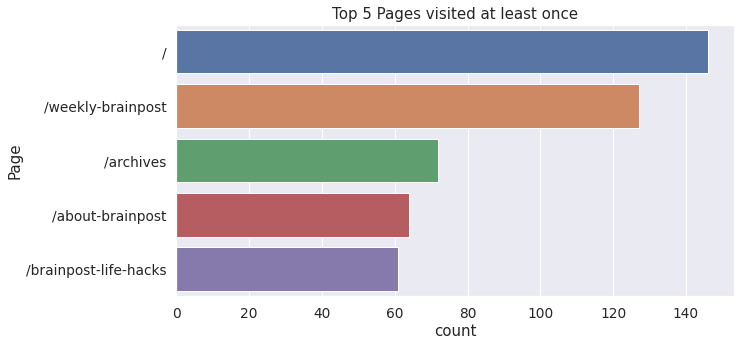

In [ ]:
# https://stackoverflow.com/questions/42528921/how-to-prevent-overlapping-x-axis-labels-in-sns-countplot
# https://stackoverflow.com/questions/46623583/seaborn-countplot-order-categories-by-count
# https://stackoverflow.com/questions/25328003/how-can-i-change-the-font-size-using-seaborn-facetgrid

data = df[df['Page_count'] >= 61]
plt.figure(figsize=(10, 5))
sns.set(font_scale=1.25)
title = 'Top 5 Pages visited at least once'
sns.countplot(y = data['Page'], 
                   order = data['Page'].value_counts().index)
plt.title(title)
plt.ioff()

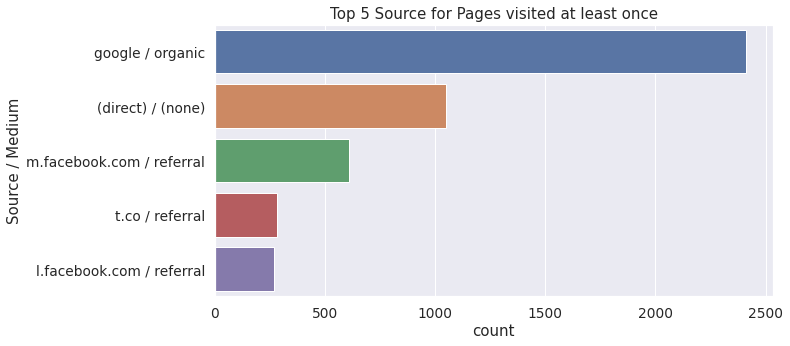

In [ ]:
data = df[df['Source_count'] >= 270]
plt.figure(figsize=(10, 5))
sns.set(font_scale=1.25)
title = 'Top 5 Source for Pages visited at least once'
sns.countplot(y = data['Source / Medium'], 
                   order = data['Source / Medium'].value_counts().index)
plt.title(title)
plt.ioff()

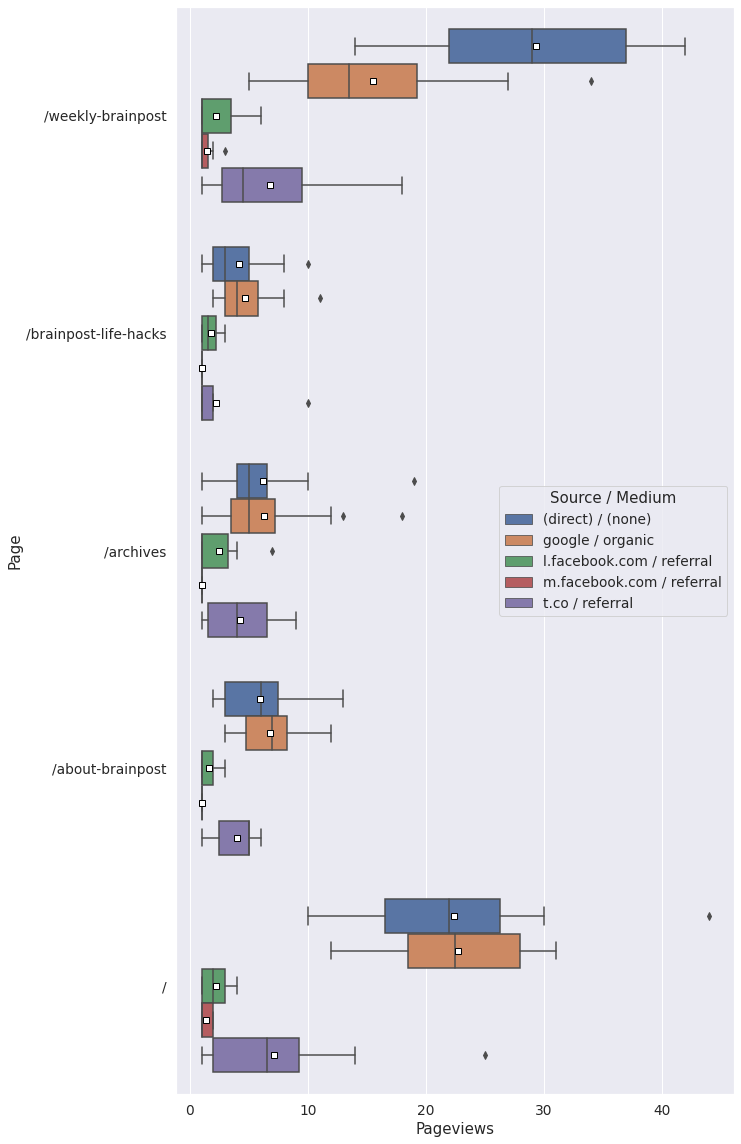

In [ ]:
# https://www.statology.org/pandas-filter-multiple-conditions/
data = df[(df['Page_count'] >= 61) & (df['Source_count'] >= 270)]
y="Page"
x="Pageviews"

title = ""
plt.figure(figsize=(10, 20))
sns.set(font_scale=1.25)
sns.boxplot(x=x, y=y, data=data, notch=False, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"},
            hue='Source / Medium')
plt.title(title)
plt.ioff()

It seems that direct referal users spend more time on page for the weekly-brainpost page.
It is probalby indicative that this user open the link from the mail list and 
are more interested in the content than user finding the site from google search.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5515 entries, 1 to 9057
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Page               5515 non-null   object 
 1   Source / Medium    5515 non-null   object 
 2   Date Range         5515 non-null   object 
 3   Pageviews          5515 non-null   float64
 4   Unique Pageviews   5515 non-null   float64
 5   Avg. Time on Page  5515 non-null   object 
 6   Entrances          5515 non-null   float64
 7   Bounce Rate        5515 non-null   float64
 8   % Exit             5515 non-null   float64
 9   Page Value         5515 non-null   float64
 10  Page Title         2827 non-null   object 
 11  Page_count         5515 non-null   int64  
 12  Source_count       5515 non-null   int64  
 13  Page_Title_count   2827 non-null   float64
dtypes: float64(7), int64(2), object(5)
memory usage: 646.3+ KB


In [ ]:
# https://stackoverflow.com/questions/32375471/pandas-convert-strings-to-time-without-date
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
# df_Pageviews_filtered['time'] = pd.to_datetime(df_Pageviews_filtered['Avg. Time on Page'], format='%H:%M:%S').dt.time
df['time'] = pd.to_datetime(df['Avg. Time on Page'],  format='%H:%M:%S')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5515 entries, 1 to 9057
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Page               5515 non-null   object        
 1   Source / Medium    5515 non-null   object        
 2   Date Range         5515 non-null   object        
 3   Pageviews          5515 non-null   float64       
 4   Unique Pageviews   5515 non-null   float64       
 5   Avg. Time on Page  5515 non-null   object        
 6   Entrances          5515 non-null   float64       
 7   Bounce Rate        5515 non-null   float64       
 8   % Exit             5515 non-null   float64       
 9   Page Value         5515 non-null   float64       
 10  Page Title         2827 non-null   object        
 11  Page_count         5515 non-null   int64         
 12  Source_count       5515 non-null   int64         
 13  Page_Title_count   2827 non-null   float64       
 14  time    

In [ ]:
df[['time']]

,time
1,1900-01-01 00:00:00
3,1900-01-01 00:00:00
5,1900-01-01 00:00:00
6,1900-01-01 00:00:00
8,1900-01-01 00:00:00
...,...
9048,1900-01-01 00:00:00
9051,1900-01-01 00:00:00
9053,1900-01-01 00:00:00
9055,1900-01-01 00:00:06


In [ ]:
df['time'] = pd.to_datetime(df['time'], unit='s')

In [ ]:
df[['time']]

,time
1,1900-01-01 00:00:00
3,1900-01-01 00:00:00
5,1900-01-01 00:00:00
6,1900-01-01 00:00:00
8,1900-01-01 00:00:00
...,...
9048,1900-01-01 00:00:00
9051,1900-01-01 00:00:00
9053,1900-01-01 00:00:00
9055,1900-01-01 00:00:06


In [ ]:
# Convert the Av time to second
# Will need to vectorize to apply this function to every row
# https://stackoverflow.com/questions/22923775/calculate-pandas-dataframe-time-difference-between-two-columns-in-hours-and-minu

t1 = pd.to_datetime('1900-01-01 00:00:00')
t2 = pd.to_datetime('1900-01-01 00:00:06')

pd.Timedelta(t2 - t1).seconds

6

In [ ]:
df[['time0']] = pd.to_datetime('1900-01-01 00:00:00')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5515 entries, 1 to 9057
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Page               5515 non-null   object        
 1   Source / Medium    5515 non-null   object        
 2   Date Range         5515 non-null   object        
 3   Pageviews          5515 non-null   float64       
 4   Unique Pageviews   5515 non-null   float64       
 5   Avg. Time on Page  5515 non-null   object        
 6   Entrances          5515 non-null   float64       
 7   Bounce Rate        5515 non-null   float64       
 8   % Exit             5515 non-null   float64       
 9   Page Value         5515 non-null   float64       
 10  Page Title         2827 non-null   object        
 11  Page_count         5515 non-null   int64         
 12  Source_count       5515 non-null   int64         
 13  Page_Title_count   2827 non-null   float64       
 14  time    

In [ ]:
df['time_diff'] = df['time'] - df['time0']
#df_Pageviews_filtered

In [ ]:
df['time_second'] = df['time_diff'].dt.total_seconds().astype(int)

In [ ]:
df[['time_second']]

,time_second
1,0
3,0
5,0
6,0
8,0
...,...
9048,0
9051,0
9053,0
9055,6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5515 entries, 1 to 9057
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   Page               5515 non-null   object         
 1   Source / Medium    5515 non-null   object         
 2   Date Range         5515 non-null   object         
 3   Pageviews          5515 non-null   float64        
 4   Unique Pageviews   5515 non-null   float64        
 5   Avg. Time on Page  5515 non-null   object         
 6   Entrances          5515 non-null   float64        
 7   Bounce Rate        5515 non-null   float64        
 8   % Exit             5515 non-null   float64        
 9   Page Value         5515 non-null   float64        
 10  Page Title         2827 non-null   object         
 11  Page_count         5515 non-null   int64          
 12  Source_count       5515 non-null   int64          
 13  Page_Title_count   2827 non-null   float64      

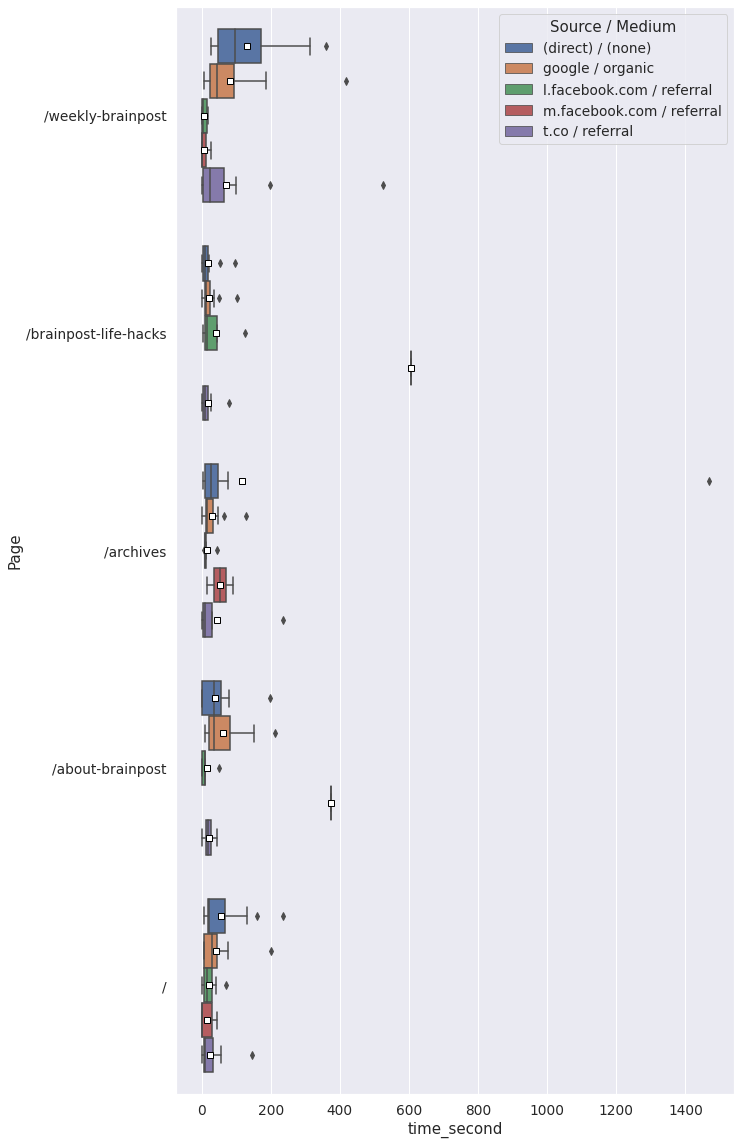

In [ ]:
sns.set_style("whitegrid")
# https://www.statology.org/pandas-filter-multiple-conditions/
data = df[(df['Page_count'] >= 61) & (df['Source_count'] >= 270)]
y="Page"
x="time_second"

title = ""
plt.figure(figsize=(10, 20))
sns.set(font_scale=1.25)
sns.boxplot(x=x, y=y, data=data, notch=False, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"},
            hue='Source / Medium')
plt.title(title)
plt.ioff()

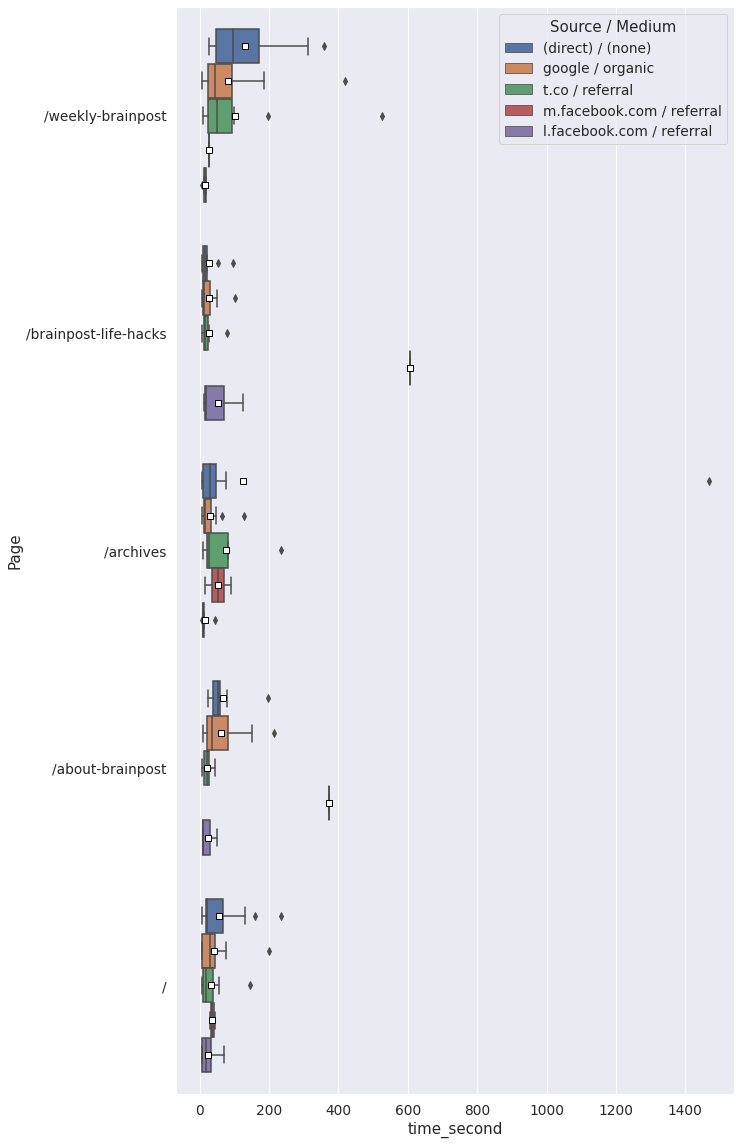

In [ ]:
sns.set_style("whitegrid")
# https://www.statology.org/pandas-filter-multiple-conditions/
data = df[(df['Page_count'] >= 61) & (df['Source_count'] >= 270)]
data = data[data['time_second'] > 5]
y="Page"
x="time_second"

title = ""
plt.figure(figsize=(10, 20))
sns.set(font_scale=1.25)
sns.boxplot(x=x, y=y, data=data, notch=False, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"},
            hue='Source / Medium')
plt.title(title)
plt.ioff()

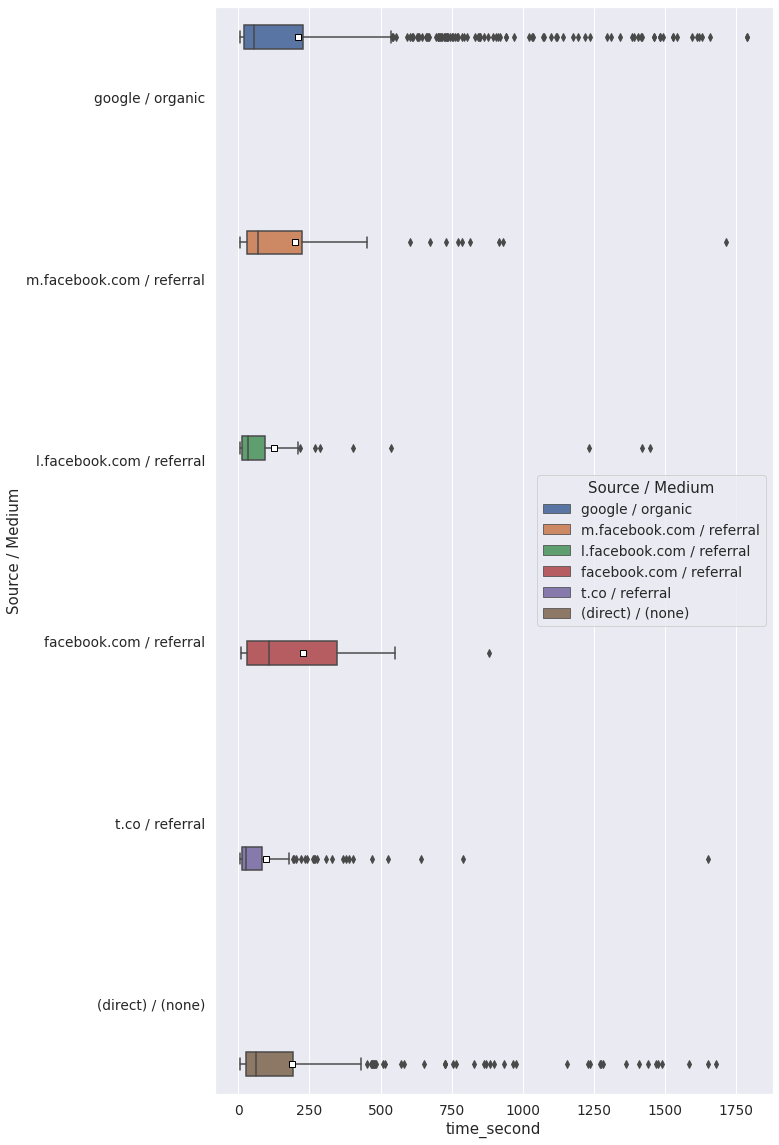

In [ ]:
sns.set_style("whitegrid")
# https://www.statology.org/pandas-filter-multiple-conditions/
#data = df[(df['Page_count'] >= 61) & (df['Source_count'] >= 270)]
data = df[df['Source_count'] >= 200]
data = data[data['time_second'] > 5]
y="Source / Medium"
x="time_second"

title = ""
plt.figure(figsize=(10, 20))
sns.set(font_scale=1.25)
sns.boxplot(x=x, y=y, data=data, notch=False, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"},
            hue='Source / Medium')
plt.title(title)
plt.ioff()

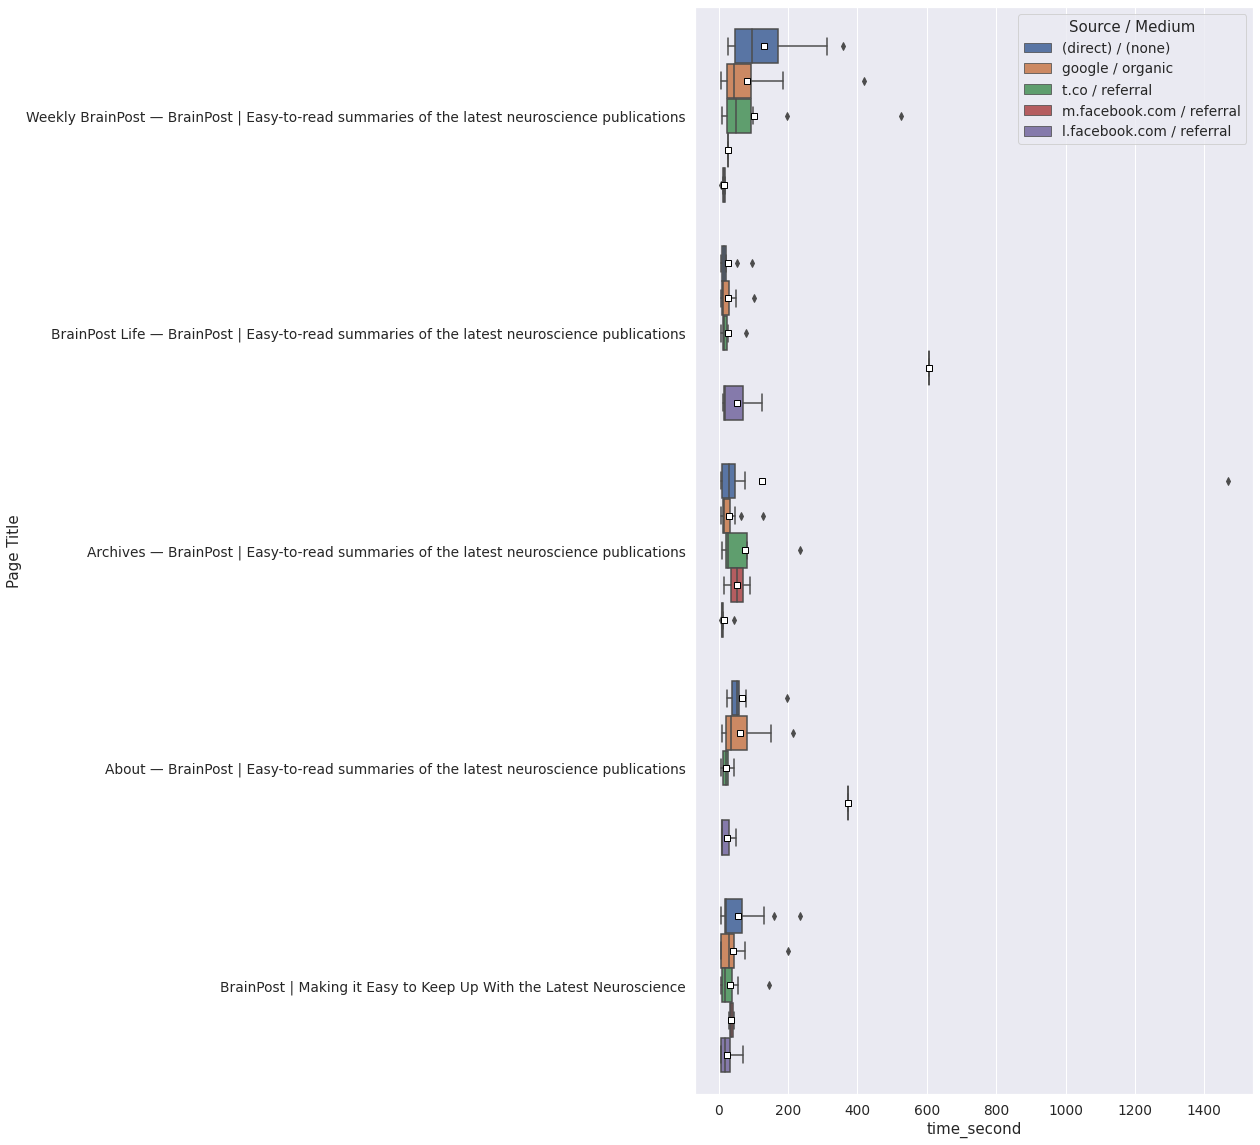

In [ ]:
# https://www.statology.org/pandas-filter-multiple-conditions/
data = df[(df['Page_count'] >= 61) & (df['Source_count'] >= 270)]
data = data[data['time_second'] > 5]
y="Page Title"
x="time_second"

title = ""
plt.figure(figsize=(10, 20))
sns.set(font_scale=1.25)
sns.boxplot(x=x, y=y, data=data, notch=False, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"},
            hue='Source / Medium')
plt.title(title)
plt.ioff()

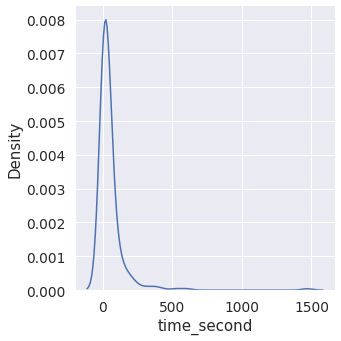

In [ ]:
# https://www.statology.org/pandas-filter-multiple-conditions/
data = df[(df['Page_count'] >= 61) & (df['Source_count'] >= 270)]
sns.displot(data, x="time_second", kind="kde")
plt.ioff()

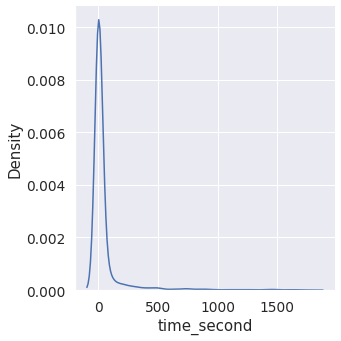

In [ ]:
# https://www.statology.org/pandas-filter-multiple-conditions/
sns.displot(df, x="time_second", kind="kde")
plt.ioff()

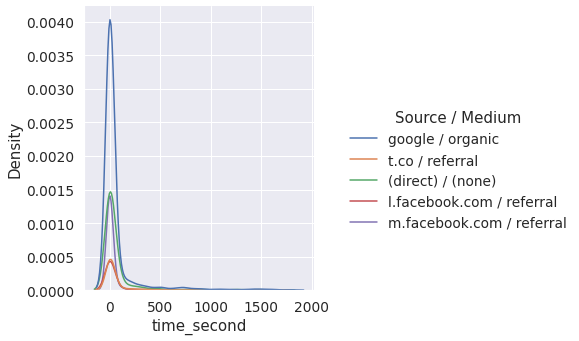

In [ ]:
# https://www.statology.org/pandas-filter-multiple-conditions/
data = df[(df['Source_count'] >= 270)]
sns.displot(data, x="time_second", kind="kde", hue='Source / Medium')
plt.ioff()

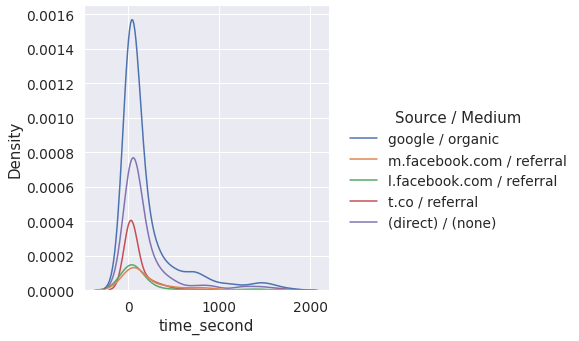

In [ ]:
# https://www.statology.org/pandas-filter-multiple-conditions/
data = df[(df['Source_count'] >= 270) & (df['time_second'] >= 5)]
sns.displot(data, x="time_second", kind="kde", hue='Source / Medium')
plt.ioff()


1.   Plot PageView by date
2.   Plot Avg. Time on Page by source
3.   PageView by source (all vs time in second more than 5)


Combine all Facebooks referal before ploting



In [ ]:
# Export table
df.to_excel('/content/drive/MyDrive/DSS/BrainPost_blog/Results/df_final.xlsx')